# Bias plotting routines

In [28]:
import matplotlib.pyplot as plt
import numpy as np
from astropy.io import fits
from datetime import datetime
import os

In [29]:
os.getcwd()

'/Users/slh/Documents/Projects/Magellan_dev/LLAMAS/llamas-pyjamas/llamas_pyjamas'

In [30]:
#taken from night UT 2024-11-29 LLAMAS commissioning excel sheet bias list

# files = ['LLAMAS_2024-11-29T08_49_10.489_mef',
# 'LLAMAS_2024-11-29T08_50_51.614_mef',
# 'LLAMAS_2024-11-29T08_53_26.854_mef',
# 'LLAMAS_2024-11-29T08_54_57.824_mef',
# 'LLAMAS_2024-11-29T08_56_20.024_mef',
# 'LLAMAS_2024-11-29T09_05_16.585_mef',
# 'LLAMAS_2024-11-29T09_06_55.081_mef',
files = ['LLAMAS_2024-11-29T09_09_16.816_mef',
'LLAMAS_2024-11-29T09_24_50.008_mef',
'LLAMAS_2024-11-29T09_25_17.497_mef',
'LLAMAS_2024-11-29T09_26_08.543_mef',
'LLAMAS_2024-11-29T09_26_56.890_mef',
'LLAMAS_2024-11-29T09_27_58.541_mef',
'LLAMAS_2024-11-29T09_28_53.157_mef']

In [31]:
#only need to append to this for the first plot generated, after that can re-use these timestamps
x_axis = []

# Initialise lists for storing values

blue_bias_1A, blue_bias_1B = [], []
blue_bias_2A, blue_bias_2B = [], []
blue_bias_3A, blue_bias_3B = [], []
blue_bias_4A, blue_bias_4B = [], []

In [32]:
for idx, item in enumerate(files):
    filepath = f'../../comissioning_data/20241129/{item}.fits'
    #only need to run this bit in the first loop
    parts = item.split("_")
    stamp = parts[1]+':'+parts[2]+':'+parts[3]
    timestamp = datetime.strptime(stamp, "%Y-%m-%dT%H:%M:%S.%f")
    x_var = timestamp.strftime("%H:%M:%S")
    x_axis.append(x_var)
                            
    hdu = fits.open(filepath)
    blue_bias_1A.append(np.median(hdu[3].data[5:20, 1024])) # Increased HDU index by 1 from green, then +3 per benchside
    blue_bias_1B.append(np.median(hdu[6].data[5:20, 1024]))
    blue_bias_2A.append(np.median(hdu[9].data[5:20, 1024]))
    blue_bias_2B.append(np.median(hdu[12].data[5:20, 1024]))
    blue_bias_3A.append(np.median(hdu[15].data[5:20, 1024]))
    blue_bias_3B.append(np.median(hdu[18].data[5:20, 1024]))
    blue_bias_4A.append(np.median(hdu[21].data[5:20, 1024]))
    blue_bias_4B.append(np.median(hdu[24].data[5:20, 1024]))

In [33]:
print(x_axis)

['09:09:16', '09:24:50', '09:25:17', '09:26:08', '09:26:56', '09:27:58', '09:28:53']


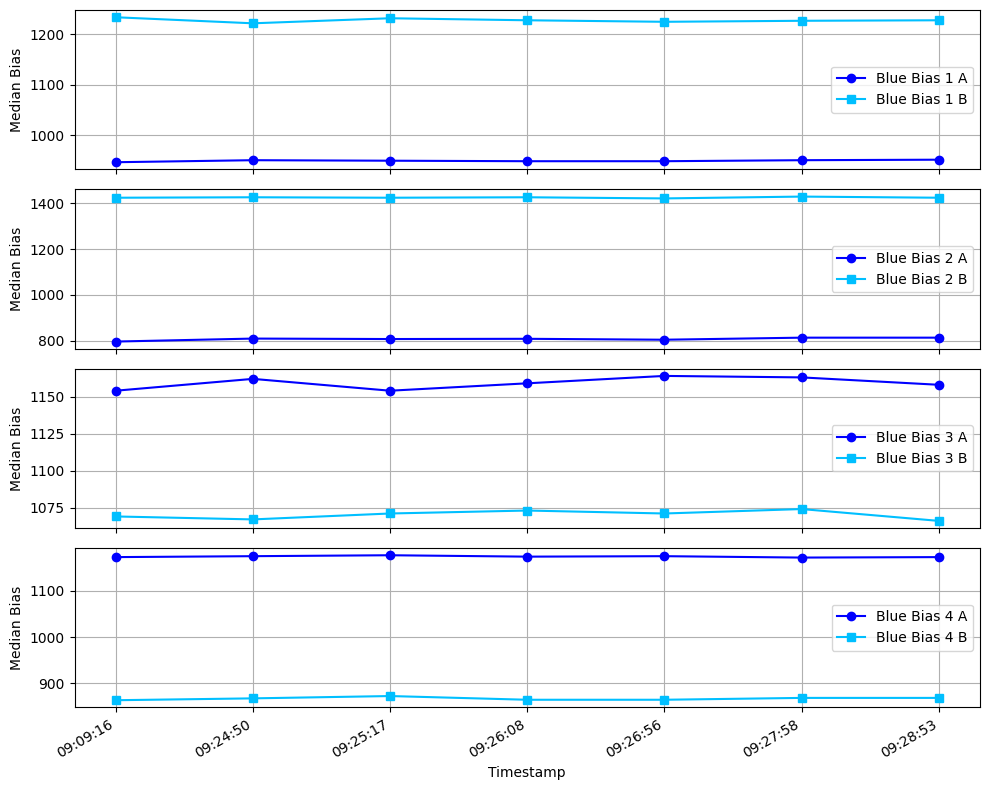

In [34]:
# Create figure with 4 subplots

fig, axes = plt.subplots(4, 1, figsize=(10, 8), sharex=True)

  

# Define plot data

plot_data = [

(blue_bias_1A, blue_bias_1B, "Blue Bias 1"),
(blue_bias_2A, blue_bias_2B, "Blue Bias 2"),
(blue_bias_3A, blue_bias_3B, "Blue Bias 3"),
(blue_bias_4A, blue_bias_4B, "Blue Bias 4"),

]


# Plot each pair of NA and NB on separate subplots

for ax, (NA, NB, title) in zip(axes, plot_data):
    ax.plot(x_axis, NA, 'o-', label=f'{title} A', color='blue')    
    ax.plot(x_axis, NB, 's-', label=f'{title} B', color='deepskyblue') 
    ax.set_ylabel("Median Bias")   
    ax.legend()    
    ax.grid()

  

# Format x-axis
axes[-1].set_xlabel("Timestamp")
fig.autofmt_xdate() # Rotates x-ticks for readability
plt.tight_layout()
plt.show()

In [ ]:
for i in idx:
    data = exobj['extractions'][i].counts
    max_val, max_row = np.nanmax(data), np.nanargmax(np.max(data, axis=1))
    #print(i, max_val, max_row)
    row_sums = np.nansum(data, axis=1)
    max_sum = np.nanmax(row_sums)
    row_with_max_sum = np.argmax(row_sums)
    print(i, max_val, max_row, max_sum, row_with_max_sum)